In [24]:
import numpy as np
import pandas as pd
import statistics as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# Data is described as "normal" if most values cluster in the center of the range, with the rest tapering off symmetrically
# to the left and the right. The mean and median of a normally distributed variable are equal

# The information in a normal distribution can be summarized by the mean μ ("mu") and standard deviation σ ("sigma").

In [21]:
# The probability density function for a normally distributed variable is:

# f(x|μ,σ**2) = (1 / (2(σ**2)π)**0.5)*e**(-((x-μ)**2)/2(σ**2))

# e is Euler’s number (e=2.71828…), a mathematical constant

In [23]:
# Approximately 68% of the values in a normally-distributed variable fall within 1 standard deviation above or below the mean,
# 95% of values fall within two standard deviations of the mean,
# and 99.7% of values fall within three standard deviations of the mean

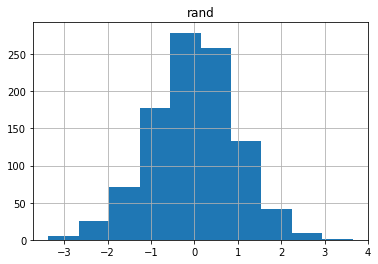

In [25]:
# We can use Python to generate a normally distributed variable by providing a mean and standard deviation

# Making a standard normally distributed variable with 1000 observations, a mean of 0, and 
# a standard deviation of 1, and putting it in a data frame.
mean = 0
sd = 1
n = 1000

df = pd.DataFrame({'rand': np.random.normal(mean, sd, n)})

df.hist()
plt.show()

In [27]:
# The normal distribution is useful for data scientists because:

# It is easily summarized using just two statistics, mean and standard deviation
# The area under the curve is 1, making it easy to calculate the probability of individual outcomes within the distribution
# Any variable that measures an outcome produced by aggregating many small independent effects will have a normal distribution
# Many statistical tests (percentiles, z-scores, t-tests, ANOVAs, bell-curve grading) assume a normal distribution

In [29]:
# there are statistical tests of non-normality, but they are sensitive to sample size.
# meaning that whether or not the test says your data is normal has more to do with how much data you have
# the best method of deciding if your data is normal is to inspect the data visually

In [30]:
# QQ plots graph a variable with an unknown distribution against a variable with a known distribution
# Values for each variable are sorted into ascending order, then plotted against each other
# the known variable is the x-axis and the unknown variable as the y-axis
# If the mystery variable shares the same distribution as the known variable, the result is linear
# Deviations from linear distribution indicate that the data does not fit a normal distribution

In [25]:
# Let’s try a QQ plot to check if data is normally distributed:

# make two variables
# random noraml distribution with a mean of 50, a sigma of 300, and 1000 observations
rand1 = np.random.normal(50, 300, 1000)
# random poisson distribution with 1 and 10000 observations
rand2 = np.random.poisson(1, 1000)

# sort values in ascending order
rand1.sort()
rand2.sort()

# make a normally distributed variable with 1000 observations, a mean of 0, and a sigma of 1 that will be our comparison
norm = np.random.normal(0, 1, 1000)
#sort values in ascending order
norm.sort()

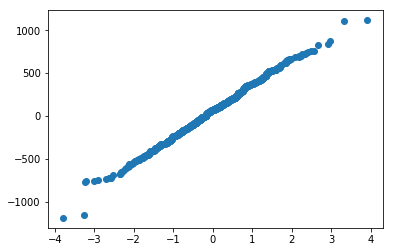

<Figure size 432x288 with 0 Axes>

In [26]:
# Plot the variable rand1 against norm in qqplots.

plt.plot(norm, rand1, 'o') 
plt.show()
plt.clf()

In [28]:
# visualize the distributions

# convert to DataFrame
df1 = pd.DataFrame({'rand1': rand1})
df2 = pd.DataFrame({'rand2': rand2})
df_norm = pd.DataFrame({'norm': norm})

df_norm.head()

,norm
0,-3.793531
1,-3.247414
2,-3.229298
3,-3.218813
4,-3.006871


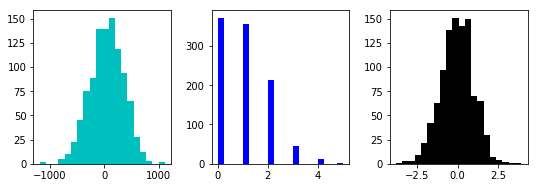

In [36]:
plt.figure(figsize=(10, 5))

plt.subplot(2, 4, 1)
plt.hist(rand1, bins=20, color='c')

plt.subplot(2, 4, 2)
plt.hist(rand2, bins=20, color='b')

plt.subplot(2, 4, 3)
plt.hist(norm, bins=20, color='k')

plt.tight_layout()
plt.show()

In [ ]:
# Plot the variable rand2 against norm in qqplots.

plt.plot(norm, rand2, "o")
plt.show()

# Looking at the QQ plot, it is clear that the values of "rand1" are normally distributed,
# while the values of "rand2" are not normally distributed
# You may notice that with a QQ plot, the scales of the known and unknown variables do not have to match.
# What matters is the relationships between datapoints within each variable.

In [ ]:
# When data are not normal, the mean and standard deviation are no longer accurate or informative summaries
# Let's make histograms of rand1 and rand2, then compute descriptive statistics to see how well they match up.

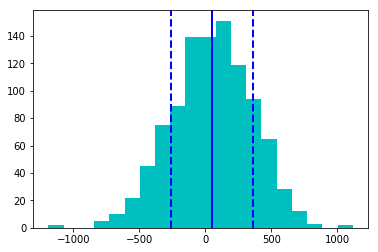

In [37]:
#Plot a histogram for rand1.
plt.hist(rand1, bins=20, color='c')

# Add a vertical line at the mean.
plt.axvline(rand1.mean(), color='b', linestyle='solid', linewidth=2)

# Add a vertical line at one standard deviation above the mean.
plt.axvline(rand1.mean() + rand1.std(), color='b', linestyle='dashed', linewidth=2)

# Add a vertical line at one standard deviation below the mean.
plt.axvline(rand1.mean()-rand1.std(), color='b', linestyle='dashed', linewidth=2) 

# Print the histogram.
plt.show()

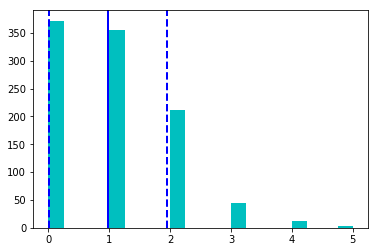

In [38]:
# Plot the same histogram for rand2.
plt.hist(rand2, bins=20, color = 'c')

# Add a vertical line at the mean.
plt.axvline(rand2.mean(), color='b', linestyle='solid', linewidth=2)

# Add a vertical line at one standard deviation above the mean.
plt.axvline(rand2.mean() + rand2.std(), color='b', linestyle='dashed', linewidth=2)

#Add a vertical line at one standard deviation below the mean.
plt.axvline(rand2.mean() - rand2.std(), color='b', linestyle='dashed', linewidth=2)

# Print the histogram.
plt.show()

In [ ]:
# Because rand1 is normal, the mean is placed where the data clusters
# with approximately 50% of the data falling on either side
# and approximately 67% of the data falling within one standard deviation of the mean
# For rand2, the mean is still placed where the data clusters, but the cluster is not centered
# the standard deviation does not encompass the same amount of data on each side of the mean
# Put another way, for rand2 the mean is no longer a measure of "central" tendency
# it does not fall in the center, and the standard deviation no longer describes how much variance there is
# Asymmetric probability distributions are described as "skewed."

In [ ]:
# there are many other probability distributions that are useful for particular statistical problems
# Note that when a distribution is discrete (only takes integers)
# it has a probability mass function, while a continuous distribution has a probability density function

In [ ]:
# The Bernoulli distribution represents two possible outcomes of an event (such as a coin flip)
# Summarized by p, the probability of the outcome k
# f(k|p) = { p,  if k = 1
#           1-P, if k = 0

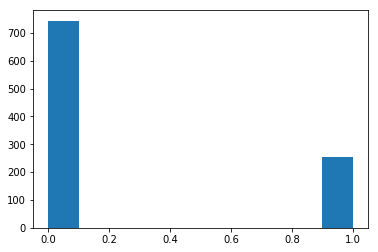

In [40]:
# Generate a bernoulli distribution with p =0.5.
bernoulli= np.random.binomial(1, .5, 1000)

#Plot a histogram.
plt.hist(bernoulli)

# Print the histogram
plt.show()

In [ ]:
# A binomial distribution counts the number of successes when an event with two possible outcomes
# the event is repeated many times (such as many coin flips). 
# Summarized by p, the probability of getting k successes during n repetitions of the event

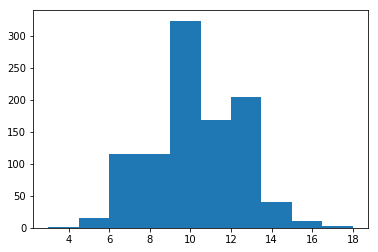

In [41]:
# Generate a binomial distribution with n=20 and p=0.5.
binomial = np.random.binomial(20, 0.5, 1000)

# Plot a histogram.
plt.hist(binomial)

# Print the histogram.
plt.show()

In [ ]:
# The gamma distribution represents the time until an event (such as lifespan until death)
# when the event starts out unlikely (few people die in youth), becomes more likely (more people die in old age)
# then becomes less likely again (few people die in extreme old age because most have already died)
# Summarized by a shape parameter ( αα ) and an inverse-scale parameter ( ββ )

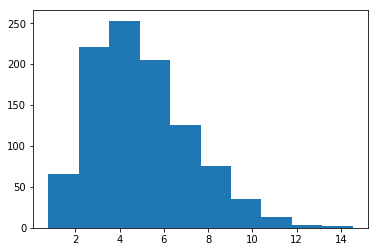

In [42]:
# Generate a gamma distribution with shape =5 and scale = 1
gamma = np.random.gamma(5,1, 1000)

# Plot a histogram.
plt.hist(gamma)

# Print the histogram.
plt.show()

In [43]:
# The poisson distribution represents the number of times a given event will occur during a given time interval
# Data can range from 0 to approaching infinity
# Summarized by  λλ  (“lambda”), the rate that events occur during a given time period
# example: phones call to a radio show. there can either never occur no phone calls during the time period

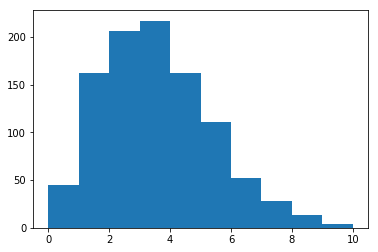

In [44]:
# Generate a Poisson distribution with lambda = 3
poisson = np.random.poisson(3, 1000)

# Plot a histogram.
plt.hist(poisson)

# Print the histogram.
plt.show()

In [45]:
# Identifying data distribution requires visualizing the data through histograms and QQ plots
# as well as knowing the source of the data (counts, probabilities, times, etc)

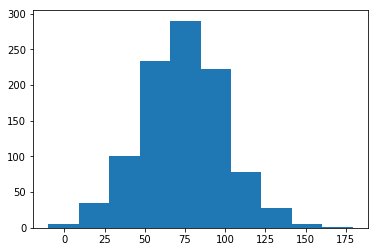

In [46]:
# Distributions can also be conditional

# Creating a data frame to hold the simulated ecommerce data, and populating it with a
# normally distributed variable with mean 75 and standard deviation 25.

ecommerce = pd.DataFrame()
ecommerce['spending'] = np.random.normal(75, 25, 1000)

# Plot a histogram.
plt.hist(ecommerce['spending'])
plt.show()

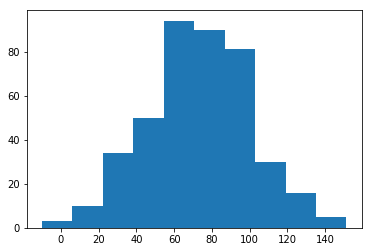

In [47]:
# But let's say we're actually interested in a subset of that population
# for instance visitors who visited the site more than twice. That data may look like this:

# Adding a variable with counts of number of times visiting the site.
ecommerce['visit_count'] = np.random.randint(0, 5, 1000)

# Selecting only the cases where the visit count is greater than two and plotting those.
plt.hist(ecommerce[ecommerce['visit_count'] > 2]['spending'])
plt.show()